In [4]:
# 9 pm 

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timezone
import numpy as np

In [5]:
dstr = "501"
day = int(dstr[1:])

test = pd.read_csv(dstr+ ".csv")

# # ALTER THIS!
seg = test[(test['messages.address'] == '+639233468687')].reset_index(drop=True)

FMT = '%Y-%m-%d %H:%M:%S'
then = np.int64(datetime.strptime("2020-04-" + str(30) + " 20:00:00",FMT).strftime("%s")) * 1000
now = np.int64(datetime.strptime("2020-05-" + str(day) + " 19:59:29",FMT).strftime("%s")) * 1000
tout = seg[(seg["messages.body"].str.find("PAGGAWAS") != -1) & ((seg["messages.date"] >= then) 
                                                                & (seg["messages.date"] <= now))]
# tin = seg[(seg["messages.body"].str.find("PABALIK") != -1) & ((seg["messages.date"] >= then) 
#                                                                 & (seg["messages.date"] <= now))]
out = tout[['messages.date','messages.body']].reset_index(drop=True)
# inn = tin[['messages.date','messages.body']].reset_index(drop=True)


## SAVE PRELIMINARY EXTRACTED DATA

In [6]:
# out['messages.body'] = out['messages.body'].replace('[n[P,U,T,D]','['']')
out.to_csv(dstr+"out.csv")
# inn.to_csv(dstr + "in.csv")

## CLEANING DATA

In [8]:
out = pd.read_csv(dstr+"out.csv")
# inn = pd.read_csv(dstr+"in.csv")
# print(out.head())

In [9]:

# print()
wew = pd.DataFrame()

for i in range(len(out)):
#     print(out.loc[i])
    z = out.loc[i].iloc[2]
#     print(type(z))
    sp = z.split("\\n")
    if len(sp) == 5:
        b = sp[1][9:].title().strip()
        a = sp[2][12:].title().strip()
        c = sp[3][7:].title().strip()
        d = sp[4][12:].title().strip()
        epoch = out.loc[i].iloc[1]//1000
        e = datetime.fromtimestamp(epoch).strftime('%Y-%m-%d %H:%M:%S')
        row = {'Name': b, 'Sitio': a,'Destination':d, 'Intention':c, 'Time-Out':e}
        wew = wew.append(row,ignore_index=True)
# print(wew.head())
wew = wew.sort_values(['Time-Out']).reset_index(drop=True)
# aw = pd.DataFrame()
# for i in range(len(inn)):
#     z = inn.loc[i].iloc[2]
#     sp = z.split("\\n")
#     if len(sp) == 2:
#         a = sp[1][9:].title().strip()
#         epoch = inn.loc[i].iloc[1]//1000
#         e = datetime.fromtimestamp(epoch).strftime('%Y-%m-%d %H:%M:%S')
#         row = {'Name': a,'Time-In':e}
#         aw = aw.append(row,ignore_index=True)
# aw = aw.sort_values(['Time-In']).reset_index(drop=True)
# print(wew)


## SAVE CLEAN DATA

In [10]:
wew.to_csv(dstr + "outclean.csv")
# aw.to_csv(dstr + "inclean.csv")

## JOIN OUT AND IN, CALCULATE TIME DURATION

In [17]:
wew = pd.read_csv(dstr+"outclean.csv")
# aw = pd.read_csv(dstr+"inclean.csv")

In [18]:
wew = wew.sort_values(['Time-Out']).reset_index(drop=True)
wew['Time-Out'] = pd.to_datetime(wew['Time-Out'])
# aw['Time-In'] = pd.to_datetime(aw['Time-In'])
# finn = pd.merge_asof(wew,aw,left_on='Time-Out',right_on='Time-In',by='Name',direction='forward')
# print(df)



# def func(row):
#     x = row['Time-In']
#     y = row['Time-Out']
#     return x-y

# finn['Duration'] =  finn.apply(func, axis=1)
# print(finn)

## SAVE FINAL DATA

In [19]:
wew.to_csv(dstr+"final.csv")

## STATISTICAL ANALYSIS

In [40]:
data = pd.read_csv(dstr+"final.csv")
data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1,inplace = True)
# print(data)

In [41]:
# print(data.columns)
tumong= data.groupby('Intention')['Intention'].count().tolist()
tumongnames = data['Intention'].unique().tolist()
tumongnames = [str(x) for x in tumongnames]
tumongnames.sort()
print(tumongnames)
tumongnames = ["Necessities, Supplies","Work","Money Matters"] + tumongnames[3:]
# tumongnames.insert(,0)
# tumongnames.insert(,1)
# tumongnames.insert(,2)
# print(tumongnames)
# print(len(data) - sum(tumong))
# tumong = data['Intention'].groupby(['Intention']).count()
tf = list(zip(tumongnames,tumong))
tf.append(("Wala muingon", len(data)-sum(tumong)))
for i in tf:
    print(i[0])
print("\n\n")
for i in tf:
    print(i[1])

['1', '2', '3', 'Anak', 'Booking Softdrinks', 'Check Up', 'Family', 'Fillup', 'Hatod/Deliver', 'Kuha Bata', 'Kuha Order', 'Lawg', 'Meeting', 'Sugat', 'Uban pa', 'Visit Mother', 'nan']
Necessities, Supplies
Work
Money Matters
Anak
Booking Softdrinks
Check Up
Family
Fillup
Hatod/Deliver
Kuha Bata
Kuha Order
Lawg
Meeting
Sugat
Uban pa
Visit Mother
Wala muingon



93
38
16
1
1
1
1
1
3
1
1
2
1
1
8
1
6


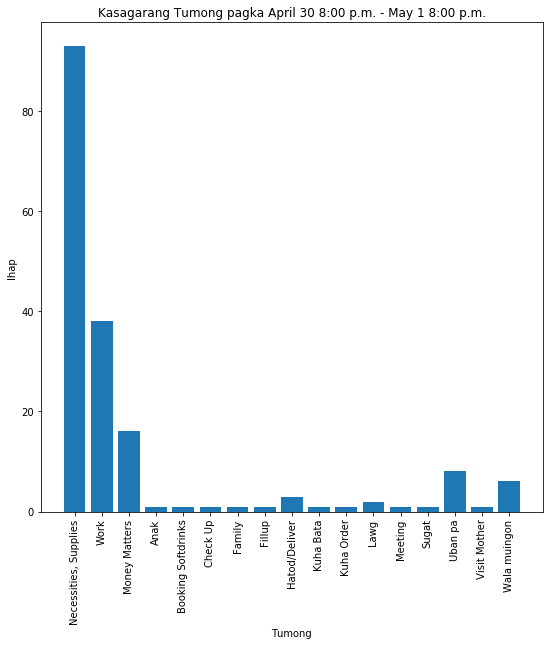

In [42]:
x = [tf[i][0] for i in range(len(tf))]
y = [tf[i][1] for i in range(len(tf))]

ab = plt.figure(figsize=(9,9))
ax = plt.subplot()
plt.bar(range(len(tf)),y)
# plt.bar(range(x),y)
# ax.set_yticks(range(max(y)+1))
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation = 90)
plt.xlabel('Tumong')
plt.ylabel('Ihap')
plt.title("Kasagarang Tumong pagka April " + str(30) + " 8:00 p.m. - May "+ str(day) +" 8:00 p.m.")
plt.show()
ab.savefig(dstr+'tumong')
# plt.labels(tumongnames)

In [43]:
def absolute_value(val):
    a  = np.round(val/100.*sum(residents), 0)
    return a

residents= data.groupby('Sitio')['Sitio'].count().tolist()
residents.append(len(data)-sum(residents))
rnames = data['Sitio'].unique().tolist()
print(rnames)
rnames = [x for x in rnames if x == 'Upper' or x == 'Lower']
rnames.append("Wala muingon")
# print(rnames)
rnames.sort()
print(str(list(zip(rnames,residents))))

['Lower', 'Upper', nan]
[('Lower', 59), ('Upper', 116), ('Wala muingon', 1)]


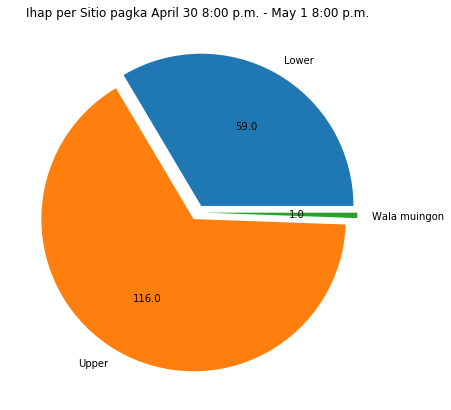

In [44]:
rs = plt.figure(figsize=(7,7))
my_explode = (0.05) * 3
plt.pie(residents, labels = rnames, autopct = absolute_value, explode =my_explode)
plt.title("")
plt.title("Ihap per Sitio pagka April " + str(30) + " 8:00 p.m. - May "+ str(day) +" 8:00 p.m.")
plt.show()
rs.savefig(dstr+"sitio")

In [45]:
trend = [346,466,297,338,250,166, 195, 167,141,196,222,159] #176
trendnames = ["April " + str(x) for x in range(19,31)] + ["May 1"] + ["May " + str(x) for x in range(1,day)]
print(trendnames)
trend.append(len(data))
print(trend[-1]) # nangawas count

['April 19', 'April 20', 'April 21', 'April 22', 'April 23', 'April 24', 'April 25', 'April 26', 'April 27', 'April 28', 'April 29', 'April 30', 'May 1']
176


In [47]:
dest= data.groupby('Destination')['Destination'].count()
dnames = data['Destination'].unique().tolist()
dnames = [x for x in dnames if type(x) == str]
dnames.sort()
fd = list(zip(dnames,dest))
fd.append(('Wala Muingon', trend[-1]-sum(dest)))
for i in fd:
    print(i[0])
    
for i in fd:
    print(i[1])

7/11
A Lopez
Ayala
Bakery
Banana
Beas
Bliss
Bonbonan
Botika
Carbon
Cebu Business Park
Chong Hua
City Hall
Colon
Colonade
Cts
Dswd
Emall
Exit-Salvador
Fuente
Gaisano
Gaisano Colon
Gaisano Tisa
Grab
Hospital
I.T Park
Julies
Kamanggahan
Katipunan
La Nueva
Labangon
Lbc Fuente
M. Lhullier
Mambaling
Mandaue
Mango Ave.
Menteryo
Mercado
Office
Palawan
Panganiban
Parian
Pasil
Punta
Quality
Salvador
Skina
Skina Menteryo
Taboan
Tisa
Tune Hotel
Upper
Wala Muingon
2
2
1
1
1
1
1
1
1
15
1
1
1
7
4
1
1
1
1
1
1
1
3
1
1
1
1
5
1
4
32
1
2
1
2
1
1
1
3
2
1
1
11
1
1
13
16
1
2
5
1
1
12


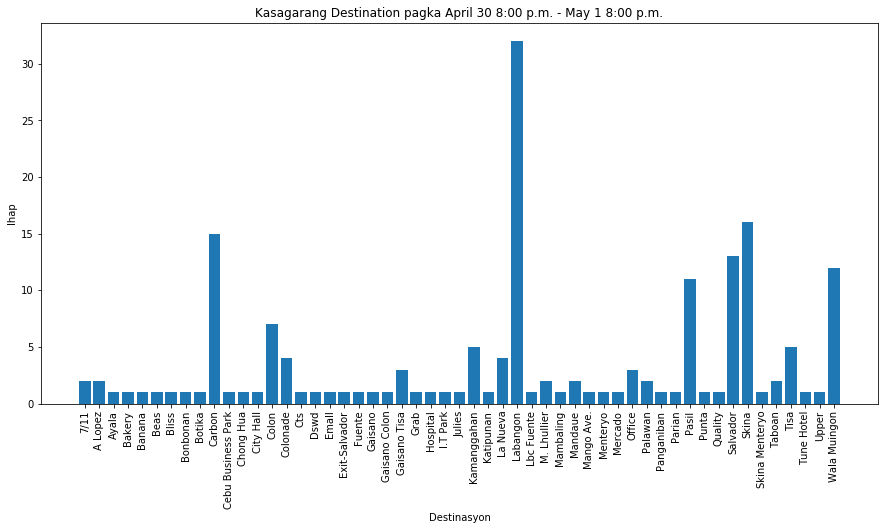

In [48]:
ab = plt.figure(figsize=(15,7))
ax = plt.subplot()

x = [fd[i][0] for i in range(len(fd))]
y = [fd[i][1] for i in range(len(fd))]

plt.bar(range(len(fd)),y)
# ax.set_yticks(range(max(y)+1))
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation = 90)
plt.xlabel('Destinasyon')
plt.ylabel('Ihap')
plt.title("Kasagarang Destination pagka April " + str(30) + " 8:00 p.m. - May "+ str(day) +" 8:00 p.m.")
plt.show()
ab.savefig(dstr+'destinasyon')

In [49]:
times = pd.DataFrame()
# print(data)
times['Count'] = pd.Series([data.loc[i].iloc[4][11:13] for i in range(len(data))])
time= times.groupby(times['Count'])['Count'].count().tolist()
tnames = times['Count'].unique().tolist()
# excess = [("0"+str(i), 0) if (i<10 and "0"+str(i) not in tnames) else (str(i), 0) if (i>=10 and str(i) not in tnames) else (tnames[i],times[i]) if str(i) in tnames else ("","") for i in range(7)]
excess = [("0"+str(i), 0) if (i<10 and "0"+str(i) not in tnames) else (str(i), 0) if (i>=10 and str(i) not in tnames) else ("","") for i in range(24)]

timed = list(zip(tnames,time)) + excess
timed = [x for x in timed if x[0] != ""]
timed.sort(key=lambda tup: tup[0]) 
timed = timed[20:] + timed[:20]
for i in timed:
    print(i[0])
    
for i in timed:
    print(i[1])

20
21
22
23
00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
0
2
0
7
0
0
4
5
8
15
20
18
33
31
18
0
0
0
0
10
2
1
2
0


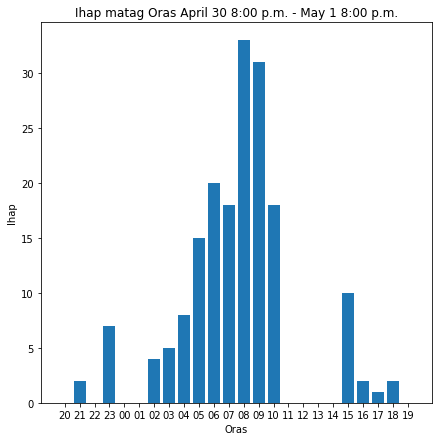

In [50]:
at = plt.figure(figsize=(7,7))
ax = plt.subplot()

x = [timed[i][0] for i in range(len(timed))]
y = [timed[i][1] for i in range(len(timed))]

plt.bar(range(len(timed)),y)
# ax.set_yticks(range(max(y)+1))
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)
plt.xlabel('Oras')
plt.ylabel('Ihap')
plt.title("Ihap matag Oras April " + str(30) + " 8:00 p.m. - May "+ str(day) +" 8:00 p.m.")
plt.show()
at.savefig(dstr + 'oras')

In [49]:
# def calc(row):
#     np.int64(datetime.strptime("2020-04-23 00:00:00",FMT).strftime("%s")) * 1000
fmd= "%H:%M:%S"
avgdur = str(data['Duration']).split("\n")
avgdur.pop()
avgdur = [x[14:22].strip() for x in avgdur]
avgdur = [x for x in avgdur if len(x) == 8]
# print(avgdur)

avgdur = [np.int64(datetime.strptime(x,fmd).strftime("%s")) for x in avgdur if x != '']
val = sum(avgdur)//len(avgdur)
print(datetime.fromtimestamp(val).strftime('%H:%M:%S'))

ZeroDivisionError: integer division or modulo by zero

In [326]:
# x = [0,1,2]
# x = x + ["hi" for i in range(10) if x<5 elif x%2==0 "wew" else "kak"]

In [83]:
x = [0,1,2]
kek = "ih"
# x.insert(kek,0)
print(x[1:])

[1, 2]


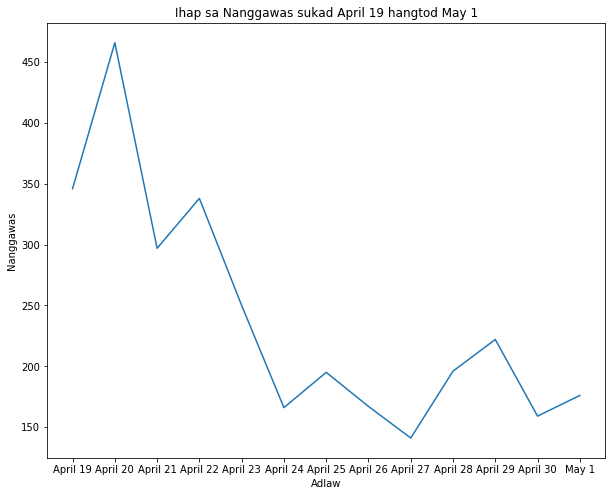

In [51]:
at = plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.plot(range(len(trendnames)),trend)
ax.set_xticks(range(len(trendnames)))
ax.set_xticklabels(trendnames)
plt.xlabel('Adlaw')
plt.ylabel('Nanggawas')
plt.title("Ihap sa Nanggawas sukad April 19 hangtod " + trendnames[-1])
plt.show()
at.savefig(dstr + 'trend')